In [43]:
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [44]:
dataframe = pd.read_csv("dadosRH.csv", encoding="latin1")
dataframe.head(20)

,Idx,NivelSalarial,AcidenteTrabalho,Saiu,Promovido5anos,Departamento,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
0,1,Baixo,0,1,0,sales,0.38,0.53,2,157,3
1,2,Médio,0,1,0,sales,0.80,0.86,5,262,6
2,3,Médio,0,1,0,sales,0.11,0.88,7,272,4
3,4,Baixo,0,1,0,sales,0.72,0.87,5,223,5
4,5,Baixo,0,1,0,sales,0.37,0.52,2,159,3
5,6,Baixo,0,1,0,sales,0.41,0.50,2,153,3
6,7,Baixo,0,1,0,sales,0.10,0.77,6,247,4
7,8,Baixo,0,1,0,sales,0.92,0.85,5,259,5
8,9,Baixo,0,1,0,sales,0.89,1.00,5,224,5
9,10,Baixo,0,1,0,sales,0.42,0.53,2,142,3


In [45]:
dataframe.isnull().values.any() # OK ! Validamos que não existem 'Null'

False

In [46]:
dataframe.describe()

,Idx,AcidenteTrabalho,Saiu,Promovido5anos,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.144610,0.238083,0.021268,0.612834,0.716102,3.803054,201.050337,3.498233
std,4329.982679,0.351719,0.425924,0.144281,0.248631,0.171169,1.232592,49.943099,1.460136
min,1.000000,0.000000,0.000000,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000
25%,3750.500000,0.000000,0.000000,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000
50%,7500.000000,0.000000,0.000000,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000
75%,11249.500000,0.000000,0.000000,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000
max,14999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000


In [47]:
dataframe[dataframe['Saiu']== 0] # não sairam 11428 colaboradores


,Idx,NivelSalarial,AcidenteTrabalho,Saiu,Promovido5anos,Departamento,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
2000,2001,Baixo,0,0,0,sales,0.58,0.74,4,215,3
2001,2002,Baixo,0,0,0,sales,0.82,0.67,2,202,3
2002,2003,Baixo,0,0,0,sales,0.45,0.69,5,193,3
2003,2004,Baixo,0,0,0,sales,0.78,0.82,5,247,3
2004,2005,Baixo,0,0,0,sales,0.49,0.60,3,214,2
...,...,...,...,...,...,...,...,...,...,...,...
14206,14207,Alto,1,0,1,management,0.90,0.55,3,259,10
14207,14208,Alto,0,0,1,management,0.74,0.95,5,266,10
14208,14209,Alto,0,0,1,management,0.85,0.54,3,185,10
14209,14210,Alto,0,0,1,marketing,0.33,0.65,3,172,10


In [48]:
df_stay = dataframe[dataframe['Saiu']== 0] # alocar a variavel "df_stay" aos que permaneceram na Empresa

In [49]:
dataframe[dataframe['Saiu']== 1] # sairam 3571

,Idx,NivelSalarial,AcidenteTrabalho,Saiu,Promovido5anos,Departamento,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
0,1,Baixo,0,1,0,sales,0.38,0.53,2,157,3
1,2,Médio,0,1,0,sales,0.80,0.86,5,262,6
2,3,Médio,0,1,0,sales,0.11,0.88,7,272,4
3,4,Baixo,0,1,0,sales,0.72,0.87,5,223,5
4,5,Baixo,0,1,0,sales,0.37,0.52,2,159,3
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,Baixo,0,1,0,support,0.40,0.57,2,151,3
14995,14996,Baixo,0,1,0,support,0.37,0.48,2,160,3
14996,14997,Baixo,0,1,0,support,0.37,0.53,2,143,3
14997,14998,Baixo,0,1,0,support,0.11,0.96,6,280,4


In [50]:
df_left = dataframe[dataframe['Saiu']== 1] # alocar a variavel "df_stay" aos que sairam da Empresa

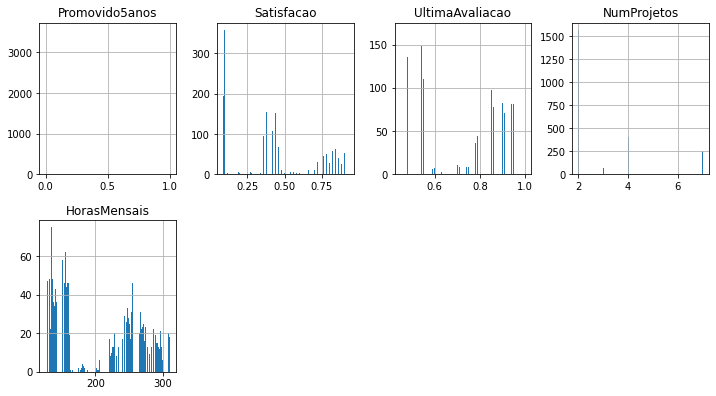

In [51]:
columns = list(df_left)[4:-1]
df_left[columns].hist(bins=300, figsize=(12,50), layout=(14,4));

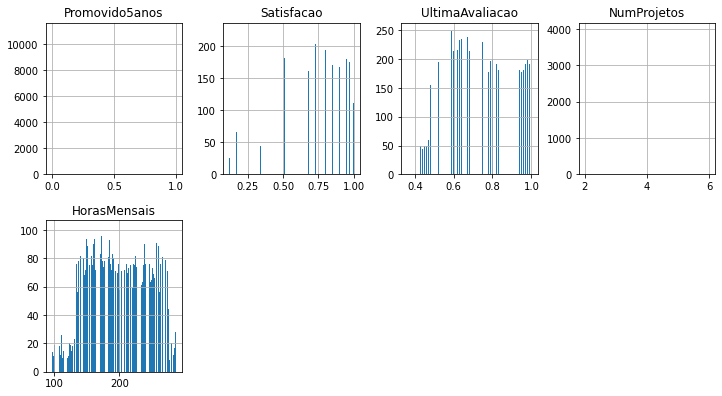

In [33]:
columns = list(df_stay)[4:-1]
df_stay[columns].hist(bins=300, figsize=(12,50), layout=(14,4));

In [52]:
dataframe[["NivelSalarial", "AcidenteTrabalho", "Promovido5anos"]]

,NivelSalarial,AcidenteTrabalho,Promovido5anos
0,Baixo,0,0
1,Médio,0,0
2,Médio,0,0
3,Baixo,0,0
4,Baixo,0,0
...,...,...,...
14994,Baixo,0,0
14995,Baixo,0,0
14996,Baixo,0,0
14997,Baixo,0,0


In [53]:
dataframe.isnull().sum(axis = 0)

Idx                 0
NivelSalarial       0
AcidenteTrabalho    0
Saiu                0
Promovido5anos      0
Departamento        0
Satisfacao          0
UltimaAvaliacao     0
NumProjetos         0
HorasMensais        0
TempoServico        0
dtype: int64

In [59]:
cond1 = dataframe[dataframe['Promovido5anos'] == 0]
cond2 = dataframe[dataframe['Saiu']== 0]
(cond1 & cond2).head()                 

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idx               14999 non-null  int64  
 1   NivelSalarial     14999 non-null  object 
 2   AcidenteTrabalho  14999 non-null  int64  
 3   Saiu              14999 non-null  int64  
 4   Promovido5anos    14999 non-null  int64  
 5   Departamento      14999 non-null  object 
 6   Satisfacao        14999 non-null  float64
 7   UltimaAvaliacao   14999 non-null  float64
 8   NumProjetos       14999 non-null  int64  
 9   HorasMensais      14999 non-null  int64  
 10  TempoServico      14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB
